In [240]:
# Libraries used for project
from sqlalchemy import create_engine, text
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from config import password

In [241]:
# Creates connection to database 
engine = create_engine(f'postgresql+psycopg2://{password}@localhost:5432/employeedb')
conn = engine.connect()

In [242]:
# Overview of departments tables in database
departments = pd.read_sql("SELECT * FROM departments;", conn)
departments.head()

# Overview of titles tables in database
titles = pd.read_sql("SELECT * FROM titles;", conn)
titles.head()

# Overview of employees tables in database
employees = pd.read_sql("SELECT * FROM employees;", conn)
employees.head()

# Overview of employees dept_emp table in database
dept_emp = pd.read_sql("SELECT * FROM dept_emp;", conn)
dept_emp.head()

# Overview of dept_manager table in database
dept_manager = pd.read_sql("SELECT * FROM dept_manager;", conn)
dept_manager.head()

# Overview of salaries table in database
salaries = pd.read_sql("SELECT * FROM salaries;", conn)
salaries.head()

,emp_no,salary
0,10001,60117.0
1,10002,65828.0
2,10003,40006.0
3,10004,40054.0
4,10005,78228.0


In [243]:
# List the department, sex, frequency of sex for employees who were hired in 1980s
employees_1980s = pd.read_sql(
    "SELECT dtt.dept_name, e.sex, COUNT(e.sex) AS frequency " + 
    "FROM departments AS dtt INNER JOIN dept_emp AS de ON dtt.dept_no=de.dept_no " +
    "LEFT JOIN employees AS e ON de.emp_no = e.emp_no " + 
    "WHERE e.hire_date BETWEEN '01/01/1980' AND '12/31/1989' " + 
    "GROUP BY dtt.dept_name, e.sex;", conn)

# List the department, sex, frequency of sex for employees who were hired in 1990s
employees_1990s = pd.read_sql(
    "SELECT dtt.dept_name, e.sex, COUNT(e.sex) AS frequency " + 
    "FROM departments AS dtt INNER JOIN dept_emp AS de ON dtt.dept_no=de.dept_no " +
    "LEFT JOIN employees AS e ON de.emp_no = e.emp_no " + 
    "WHERE e.hire_date BETWEEN '01/01/1990' AND '12/31/1999' " + 
    "GROUP BY dtt.dept_name, e.sex; ", conn)

In [244]:
#Hiring rate percentages in 1980s
total_frequency1980 = employees_1980s.drop('sex',axis=1).groupby(employees_1980s['dept_name']).sum().reset_index()

females_frequency1980 = employees_1980s.loc[employees_1980s['sex']=='F'].reset_index().drop('index',axis=1)
females_frequency1980['hiring_rate'] = (females_frequency1980['frequency']/total_frequency1980['frequency'].astype('float')*100)

males_frequency1980 = employees_1980s.loc[employees_1980s['sex']=='M'].reset_index().drop('index',axis=1)
males_frequency1980['hiring_rate'] = (males_frequency1980['frequency']/total_frequency1980['frequency'].astype('float')*100)

joined_df_1980s = females_frequency1980.merge(males_frequency1980, on=['dept_name'])
joined_df_1980s

,dept_name,sex_x,frequency_x,hiring_rate_x,sex_y,frequency_y,hiring_rate_y
0,Customer Service,F,5253,40.473072,M,7726,59.526928
1,Development,F,18866,40.134448,M,28141,59.865552
2,Finance,F,3905,40.762004,M,5675,59.237996
3,Human Resources,F,3880,39.942351,M,5834,60.057649
4,Marketing,F,4386,39.735459,M,6652,60.264541
5,Production,F,16317,40.370627,M,24101,59.629373
6,Quality Management,F,4478,40.499231,M,6579,59.500769
7,Research,F,4708,40.579210,M,6894,59.420790
8,Sales,F,11424,39.842360,M,17249,60.157640


In [245]:
#Hiring rate percentages in 1990s
total_frequency = employees_1990s.drop('sex',axis=1).groupby(employees_1990s['dept_name']).sum().reset_index()

females_frequency = employees_1990s.loc[employees_1990s['sex']=='F'].reset_index().drop('index',axis=1)
females_frequency['hiring_rate'] = (females_frequency['frequency']/total_frequency['frequency'].astype('float')*100)

males_frequency = employees_1990s.loc[employees_1990s['sex']=='M'].reset_index().drop('index',axis=1)
males_frequency['hiring_rate'] = (males_frequency['frequency']/total_frequency['frequency'].astype('float')*100)

joined_df_1990s = females_frequency.merge(males_frequency, on='dept_name')
joined_df_1990s

,dept_name,sex_x,frequency_x,hiring_rate_x,sex_y,frequency_y,hiring_rate_y
0,Customer Service,F,4194,39.566038,M,6406,60.433962
1,Development,F,15390,39.770525,M,23307,60.229475
2,Finance,F,3109,40.038635,M,4656,59.961365
3,Human Resources,F,3193,39.576103,M,4875,60.423897
4,Marketing,F,3649,39.788464,M,5522,60.211536
5,Production,F,13232,40.018146,M,19833,59.981854
6,Quality Management,F,3600,39.739486,M,5459,60.260514
7,Research,F,3731,39.174717,M,5793,60.825283
8,Sales,F,9429,40.002546,M,14142,59.997454


### <u> Frequency of Sex, by Department and Sex in 1980s and 1990s </u>

##### It seems that in 1980s and 1990s the most frequency of Males is 4847 and for the most females is 3305 in the Development department. Also, in 1980s there is a greater total increase of hires for both Males and Females however, hiring rate percentages between 1980s and 1990s of stayed relatively the same with Males (60%) and Females (40%) in each department.

Text(0.5, 0.98, 'Frequency of Sex, by Department and Sex in 1980s')

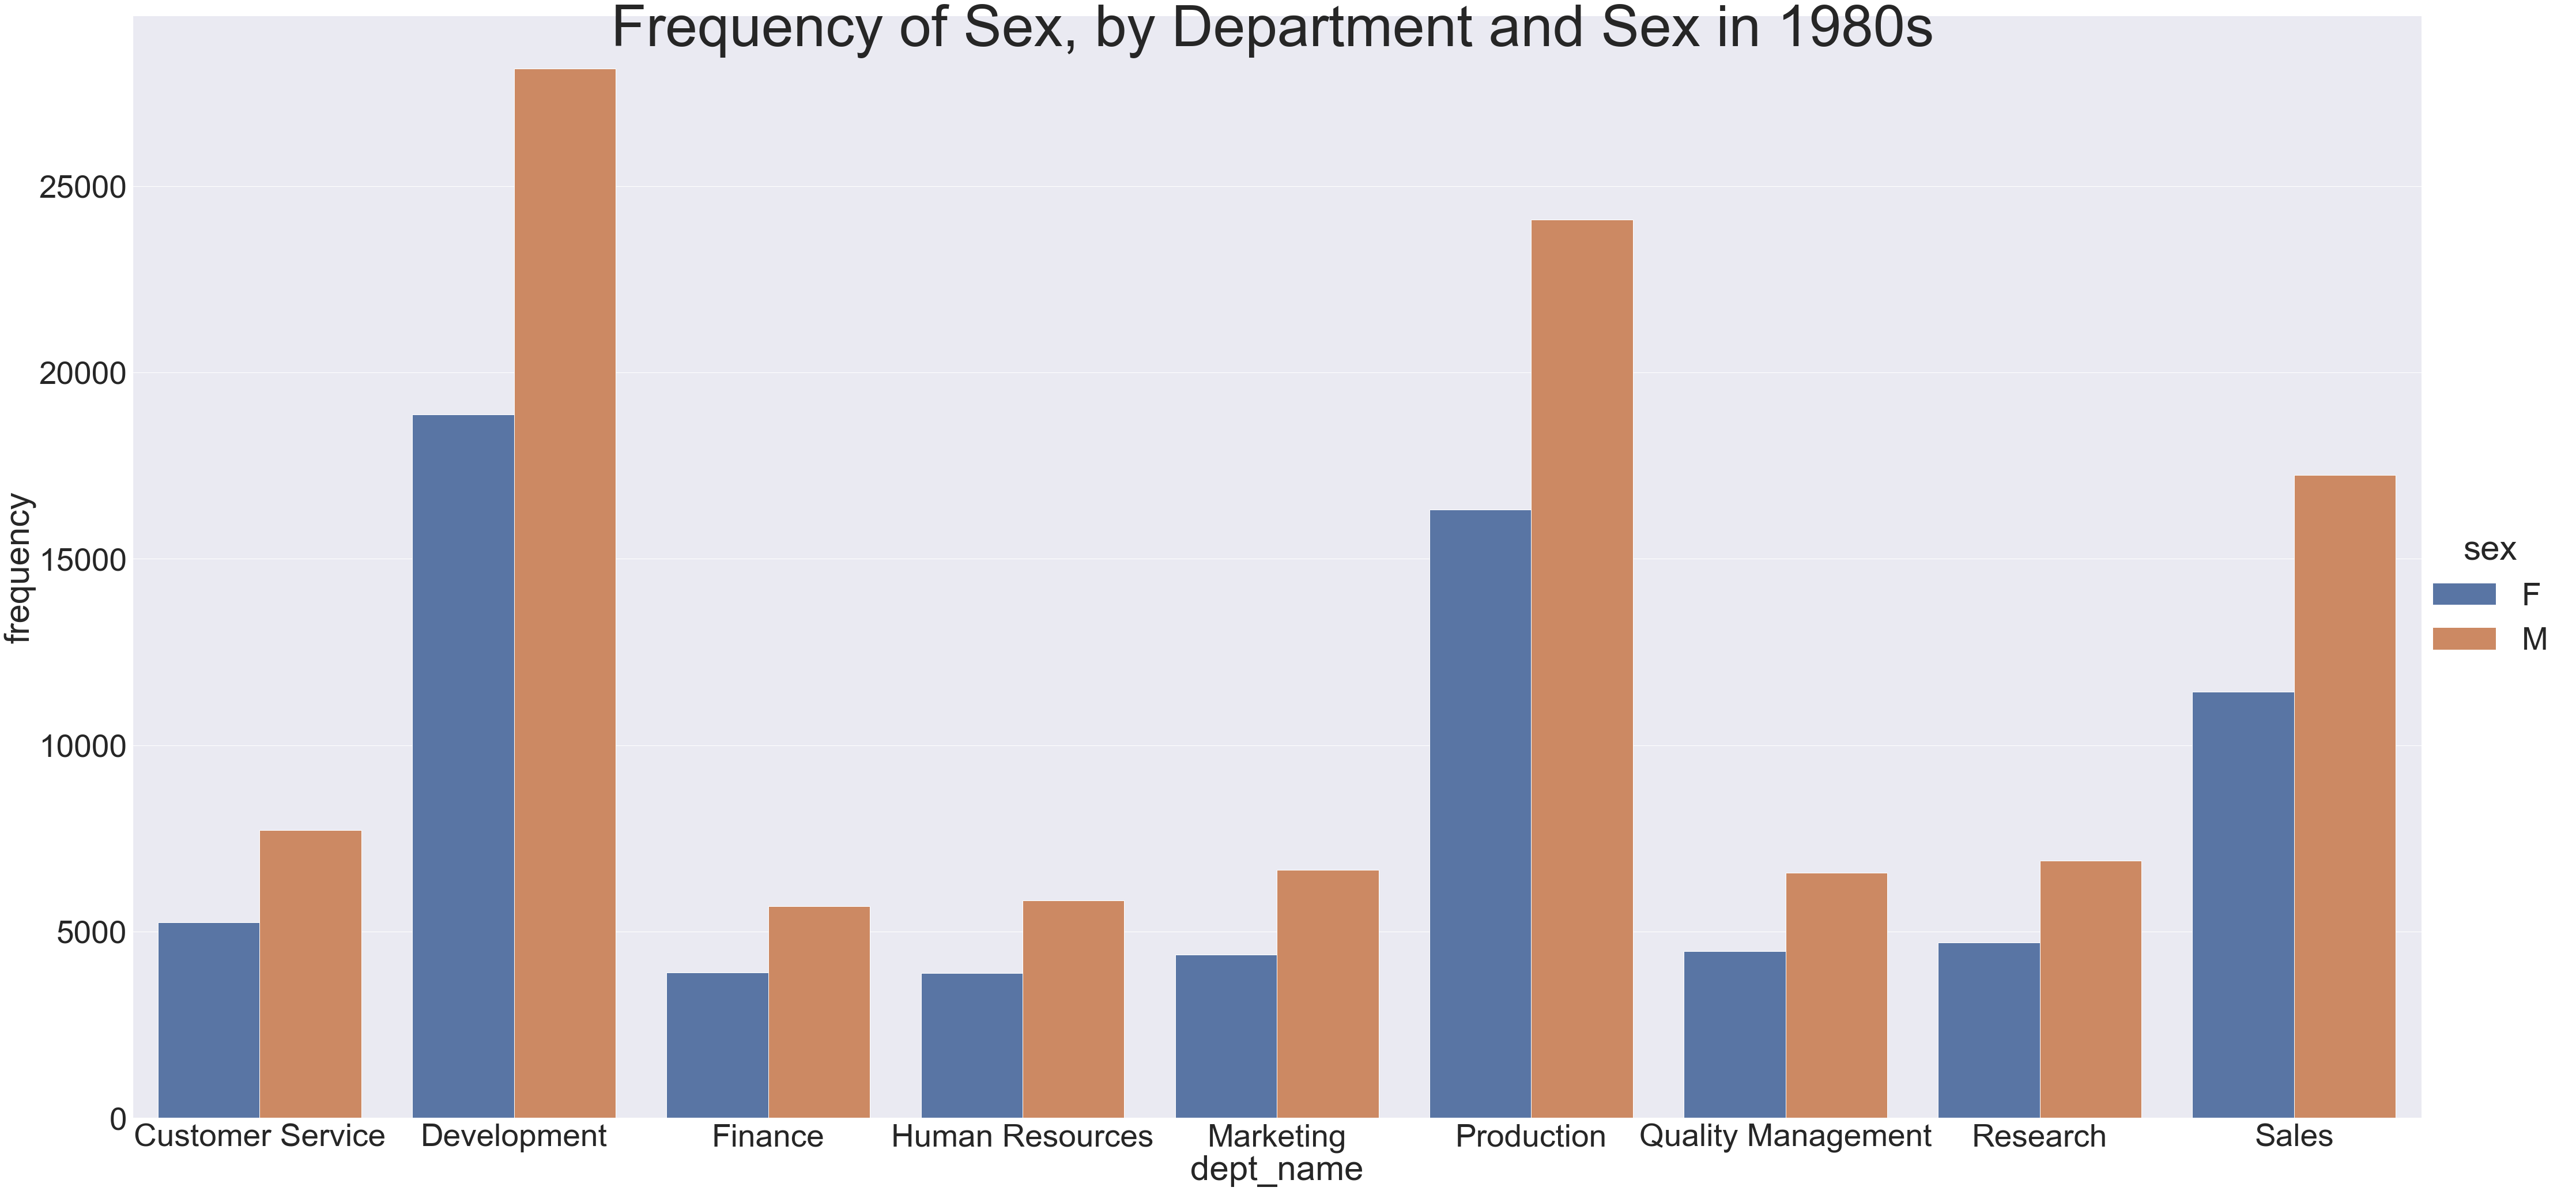

In [246]:
#Visualize the 1980s sex frequency by department and sex
sns.set(font_scale=5)
plot = sns.catplot(data=employees_1980s,kind='bar',x='dept_name',y='frequency',hue='sex', height=30, aspect=2)
plot.fig.suptitle("Frequency of Sex, by Department and Sex in 1980s",
                  fontsize=100, fontdict={"weight": "bold"})


Text(0.5, 0.98, 'Frequency of Sex, by Department and Sex in 1990s')

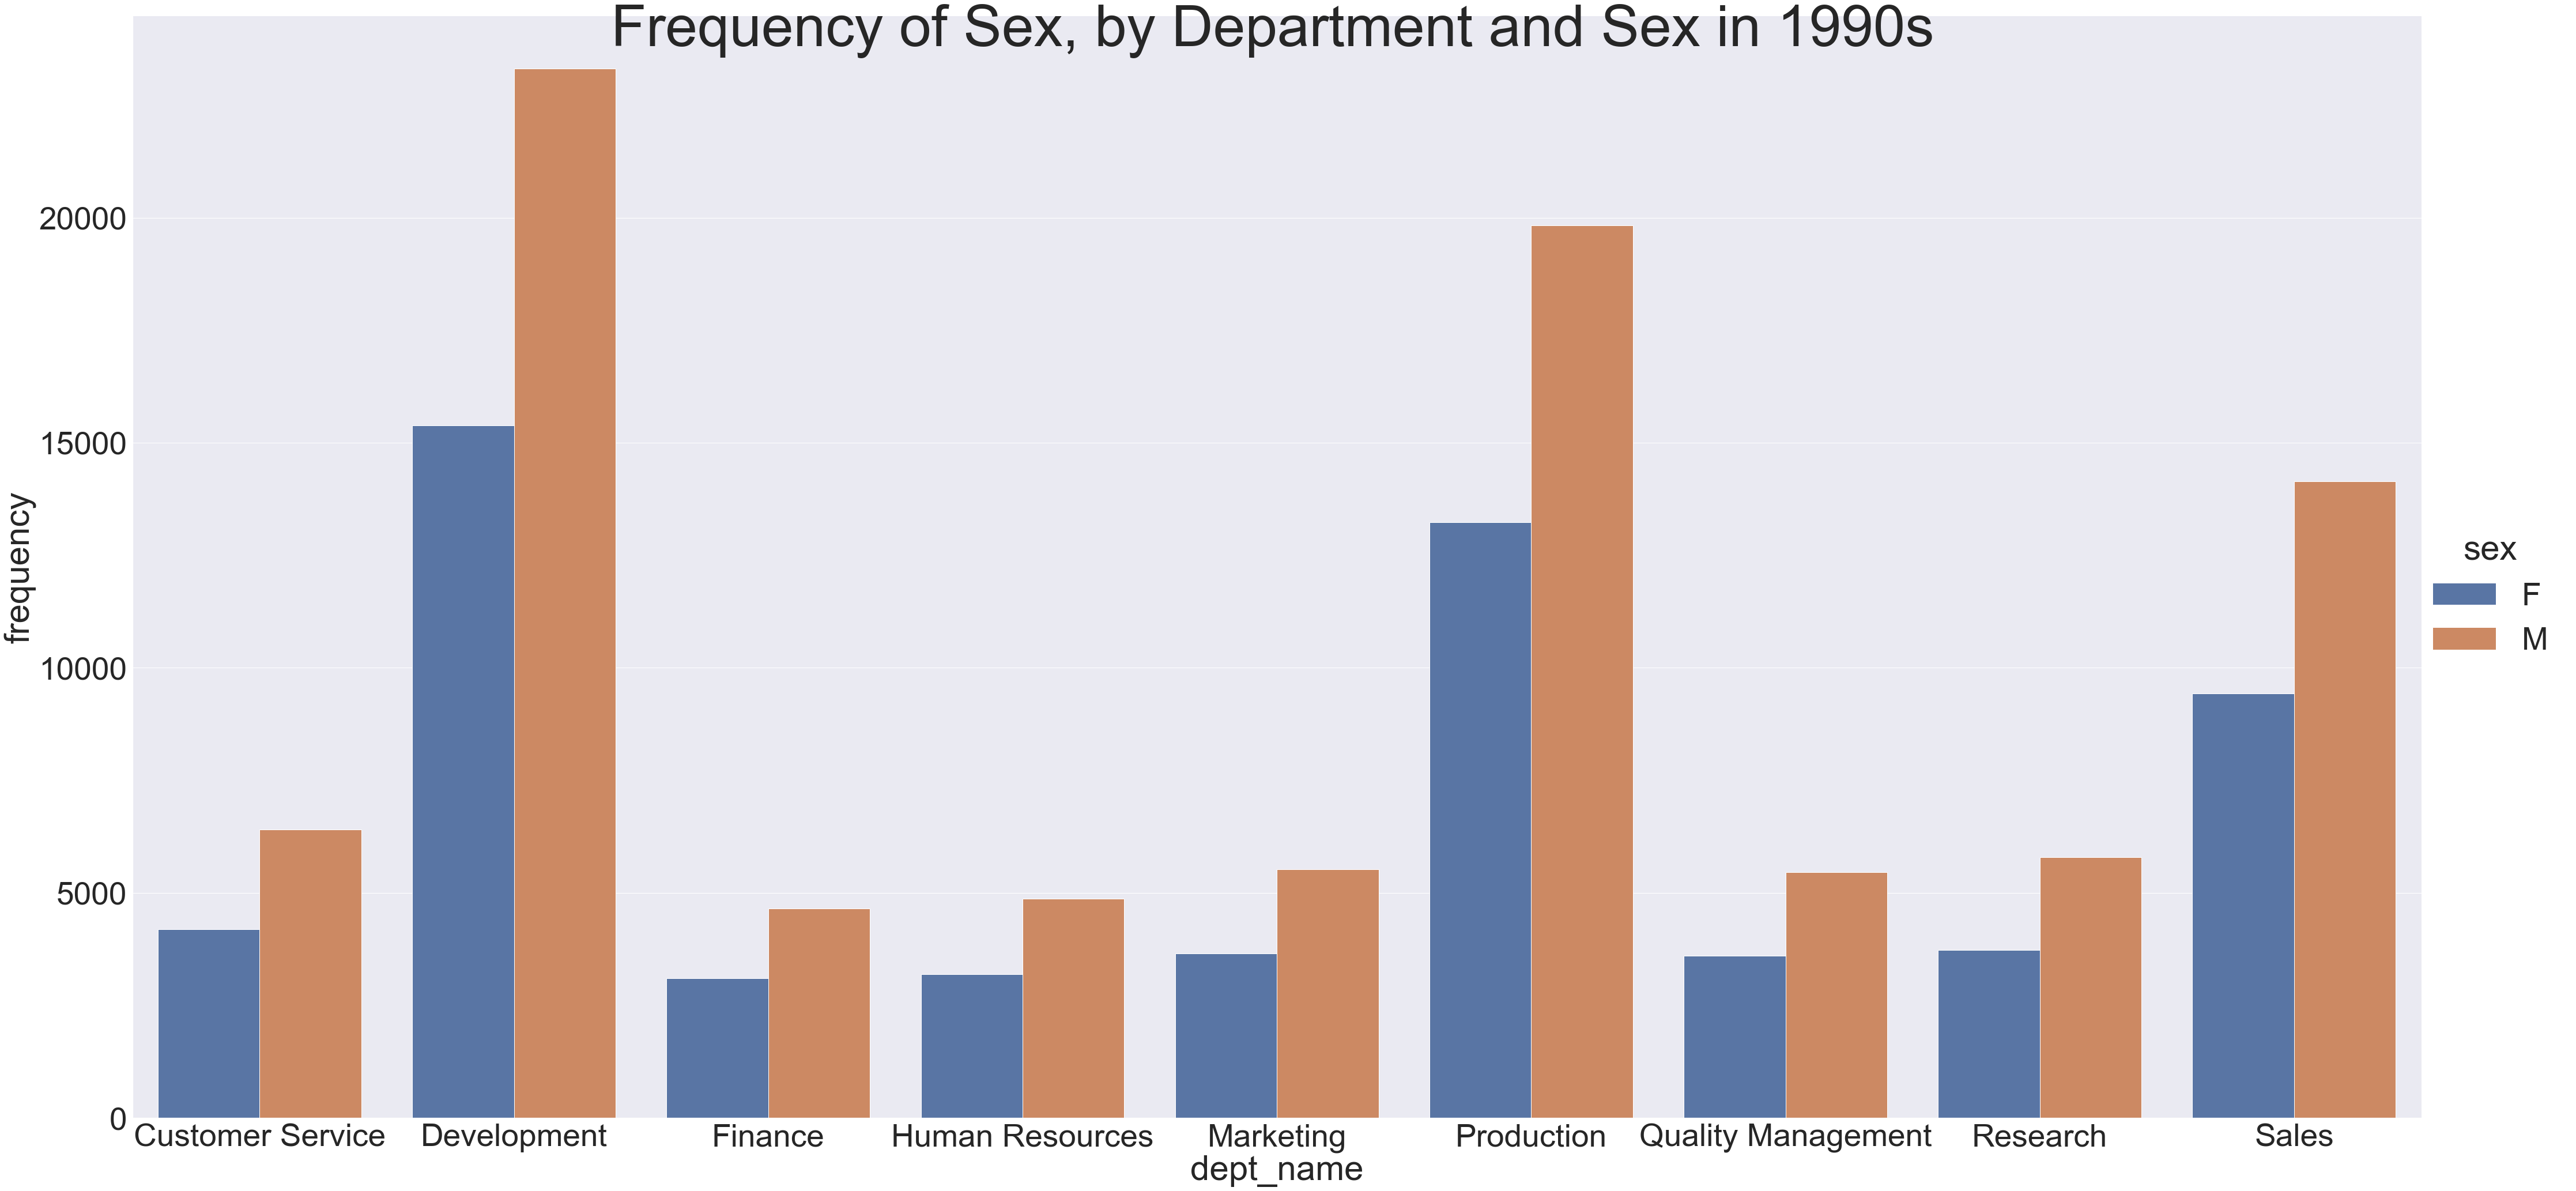

In [247]:
#Visualize the 1990s data sex frequency by department and sex
sns.set(font_scale=5)
plot = sns.catplot(data=employees_1990s,kind='bar',x='dept_name',y='frequency',hue='sex', height=30, aspect=2)
plot.fig.suptitle("Frequency of Sex, by Department and Sex in 1990s",
                  fontsize=100, fontdict={"weight": "bold"})

### <u> Top 10 Highest and Lowest Paid Positions, People, and Gender </u>

##### It seems that the highest paid position is Staff with a salary of $129492 and the lowest paid position is tied between Enginner, Staff, Senior Engineer, and Technique Leader with a salary of $40000.

In [248]:
#List the top 10 highest paid positions, people, gender, and
top10highest_salaries = pd.read_sql(
    "SELECT t.title, CONCAT(e.first_name, ' ' , e.last_name) AS full_name, e.sex, s.salary, e.birth_date " + 
    "FROM employees AS e INNER JOIN titles AS t ON e.emp_title = t.title_id " + 
    "INNER JOIN salaries AS s ON e.emp_no = s.emp_no " + 
    "ORDER BY s.salary DESC LIMIT 10;",conn)
top10highest_salaries

,title,full_name,sex,salary,birth_date
0,Staff,Charmane Griswold,M,129492.0,1956-01-14
1,Senior Staff,Slavian Peac,M,127238.0,1960-12-20
2,Staff,Nahid Varker,M,127041.0,1957-12-18
3,Staff,Poorav Esposito,M,126703.0,1955-06-04
4,Staff,Juichirou Thambidurai,M,125469.0,1963-08-16
5,Staff,Toshimo Reghbati,M,124357.0,1953-01-26
6,Senior Staff,Radoslaw Pfau,M,123749.0,1952-03-07
7,Staff,Tsutomu Alameldin,M,123668.0,1955-08-02
8,Staff,Martine Heydon,F,123477.0,1957-05-30
9,Staff,Chinhyun Klyachko,M,122726.0,1953-04-30


In [249]:
#List the top 10 lowest paid positions, people, gender, and age
top10lowest_salaries = pd.read_sql(
    "SELECT t.title, CONCAT(e.first_name, ' ' , e.last_name) AS full_name, e.sex, s.salary, e.birth_date " + 
    "FROM employees AS e INNER JOIN titles AS t ON e.emp_title = t.title_id " + 
    "INNER JOIN salaries AS s ON e.emp_no = s.emp_no " + 
    "ORDER BY s.salary ASC LIMIT 10;",conn)
top10lowest_salaries

,title,full_name,sex,salary,birth_date
0,Staff,Tsvetan Matzel,F,40000.0,1953-07-19
1,Engineer,Evgueni Srimani,F,40000.0,1961-12-25
2,Staff,Mechthild Bonifati,M,40000.0,1954-10-17
3,Staff,Kazuhito Encarnacion,M,40000.0,1964-10-13
4,Staff,Kayoko Valtorta,M,40000.0,1954-08-07
5,Senior Engineer,Amabile Gomatam,M,40000.0,1955-10-04
6,Senior Engineer,Sibyl Nooteboom,M,40000.0,1963-01-22
7,Senior Engineer,Hironoby Sidou,F,40000.0,1952-05-15
8,Senior Engineer,Subir Baja,F,40000.0,1952-02-24
9,Staff,Yoshimitsu Shobatake,M,40000.0,1960-08-28


### <u>Average Salary by Title</u>

#### The bar graph shows that senior staff and staff are paid roughly $10000 higher than other positions.

Text(0.5, 1.0, 'Average Salary by Title')

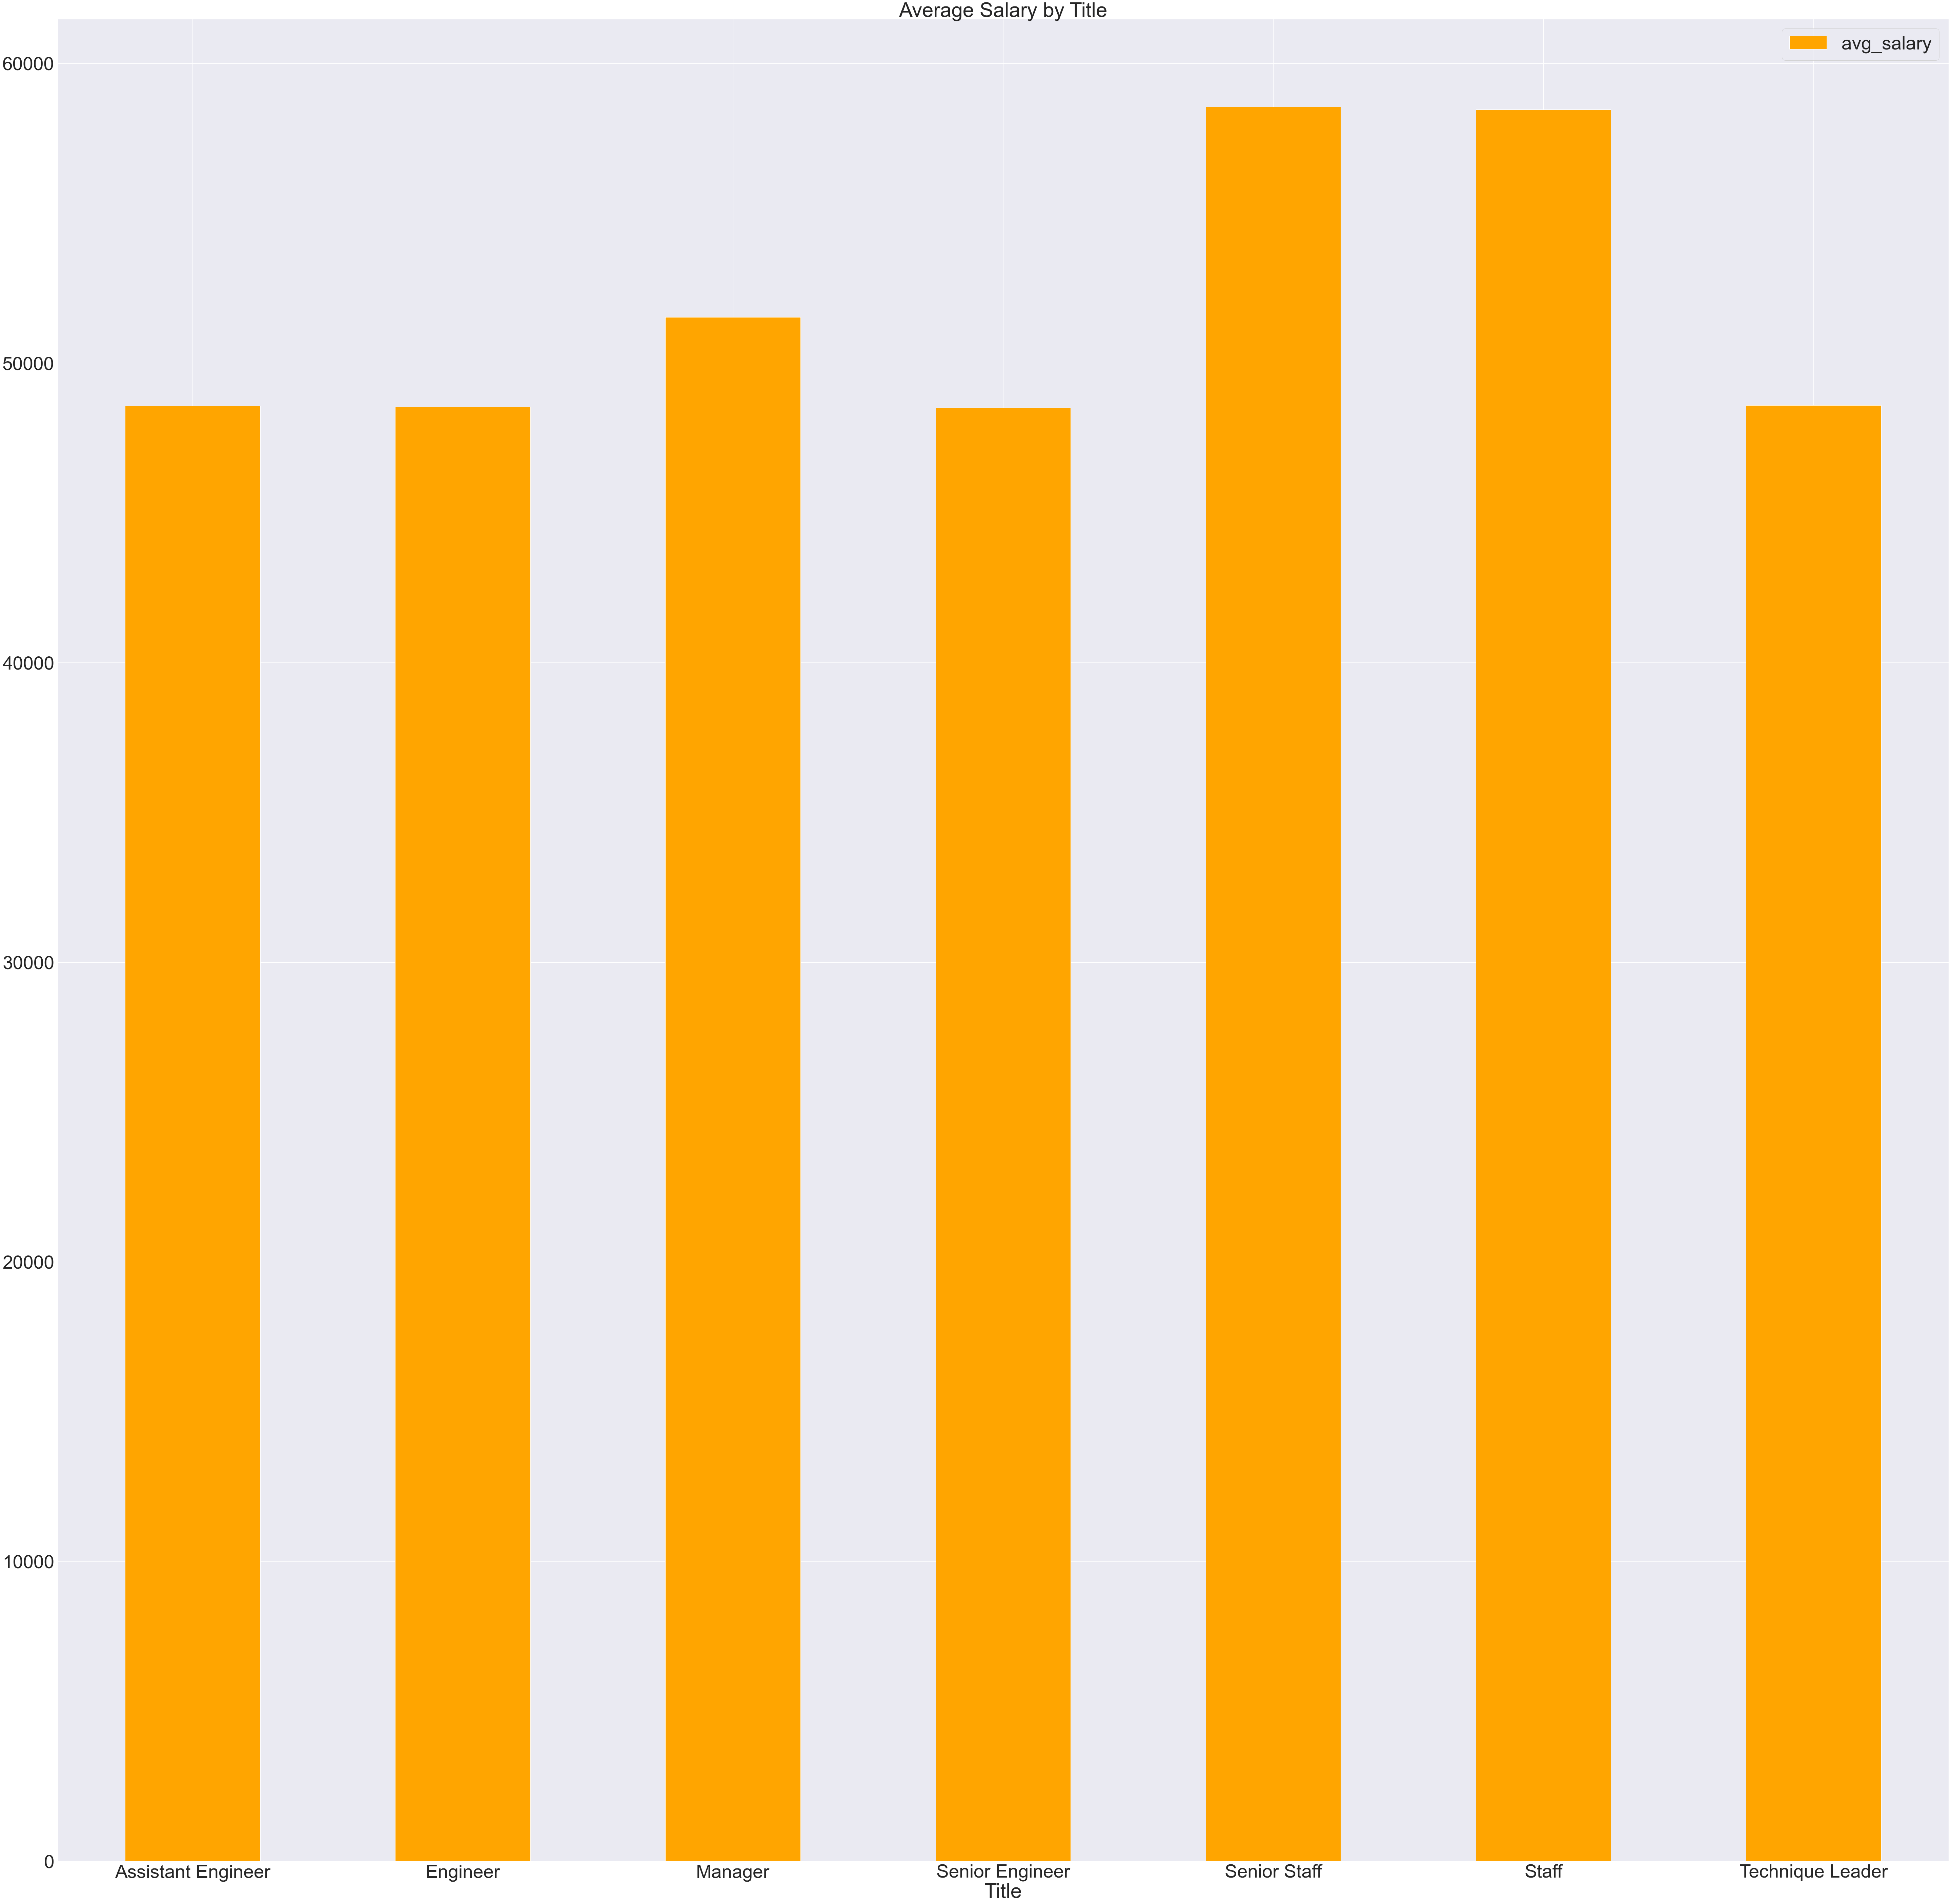

In [250]:
#Generate Bar chart of average salary by title
title_salary = pd.read_sql("SELECT t.title, AVG(s.salary) as avg_salary FROM titles as t INNER JOIN employees AS e ON t.title_id = e.emp_title INNER JOIN salaries as s ON e.emp_no = s.emp_no GROUP BY t.title", conn)
title_salary.head()

sns.set(font_scale=5)
ax = title_salary.plot.bar(x='title', rot=0, y='avg_salary', color="orange")
ax.set_xlabel('Title')
ax.set_title('Average Salary by Title')

### <u>Frequency of Above Average Salary, by Department</u>

#### The bar graph shows that a majority of employees in the Customer Service, Development, Human Resources, Production, Quality Management, Research departments are paid below average salary. However, in Marketings and Sales there seems to be an even number of employees paid above and below average.

In [251]:
# List Employees who are paid over the average in each department
frequency_over_avg = pd.read_sql(
    "SELECT  e.sex, dtt.dept_name, t.title, s.salary, e.hire_date,AVG(s.salary) OVER (PARTITION BY dtt.dept_name) as avg_salary_by_department, "+
    "CASE WHEN s.salary > (AVG(s.salary) OVER (PARTITION BY dtt.dept_name)) THEN 'Y' ELSE 'N' END as above_avg "
    "FROM departments AS dtt " +
    "INNER JOIN dept_emp AS de ON dtt.dept_no=de.dept_no " +
    "LEFT JOIN employees AS e ON de.emp_no = e.emp_no " +
    "INNER JOIN salaries AS s on s.emp_no = e.emp_no " +
    "INNER JOIN titles as t ON e.emp_title=t.title_id; " , conn)
frequency_over_avg['hire_date'] = pd.to_datetime(frequency_over_avg['hire_date'])

Text(0.5, 0.98, 'Frequency of Above Average Salary, by Department')

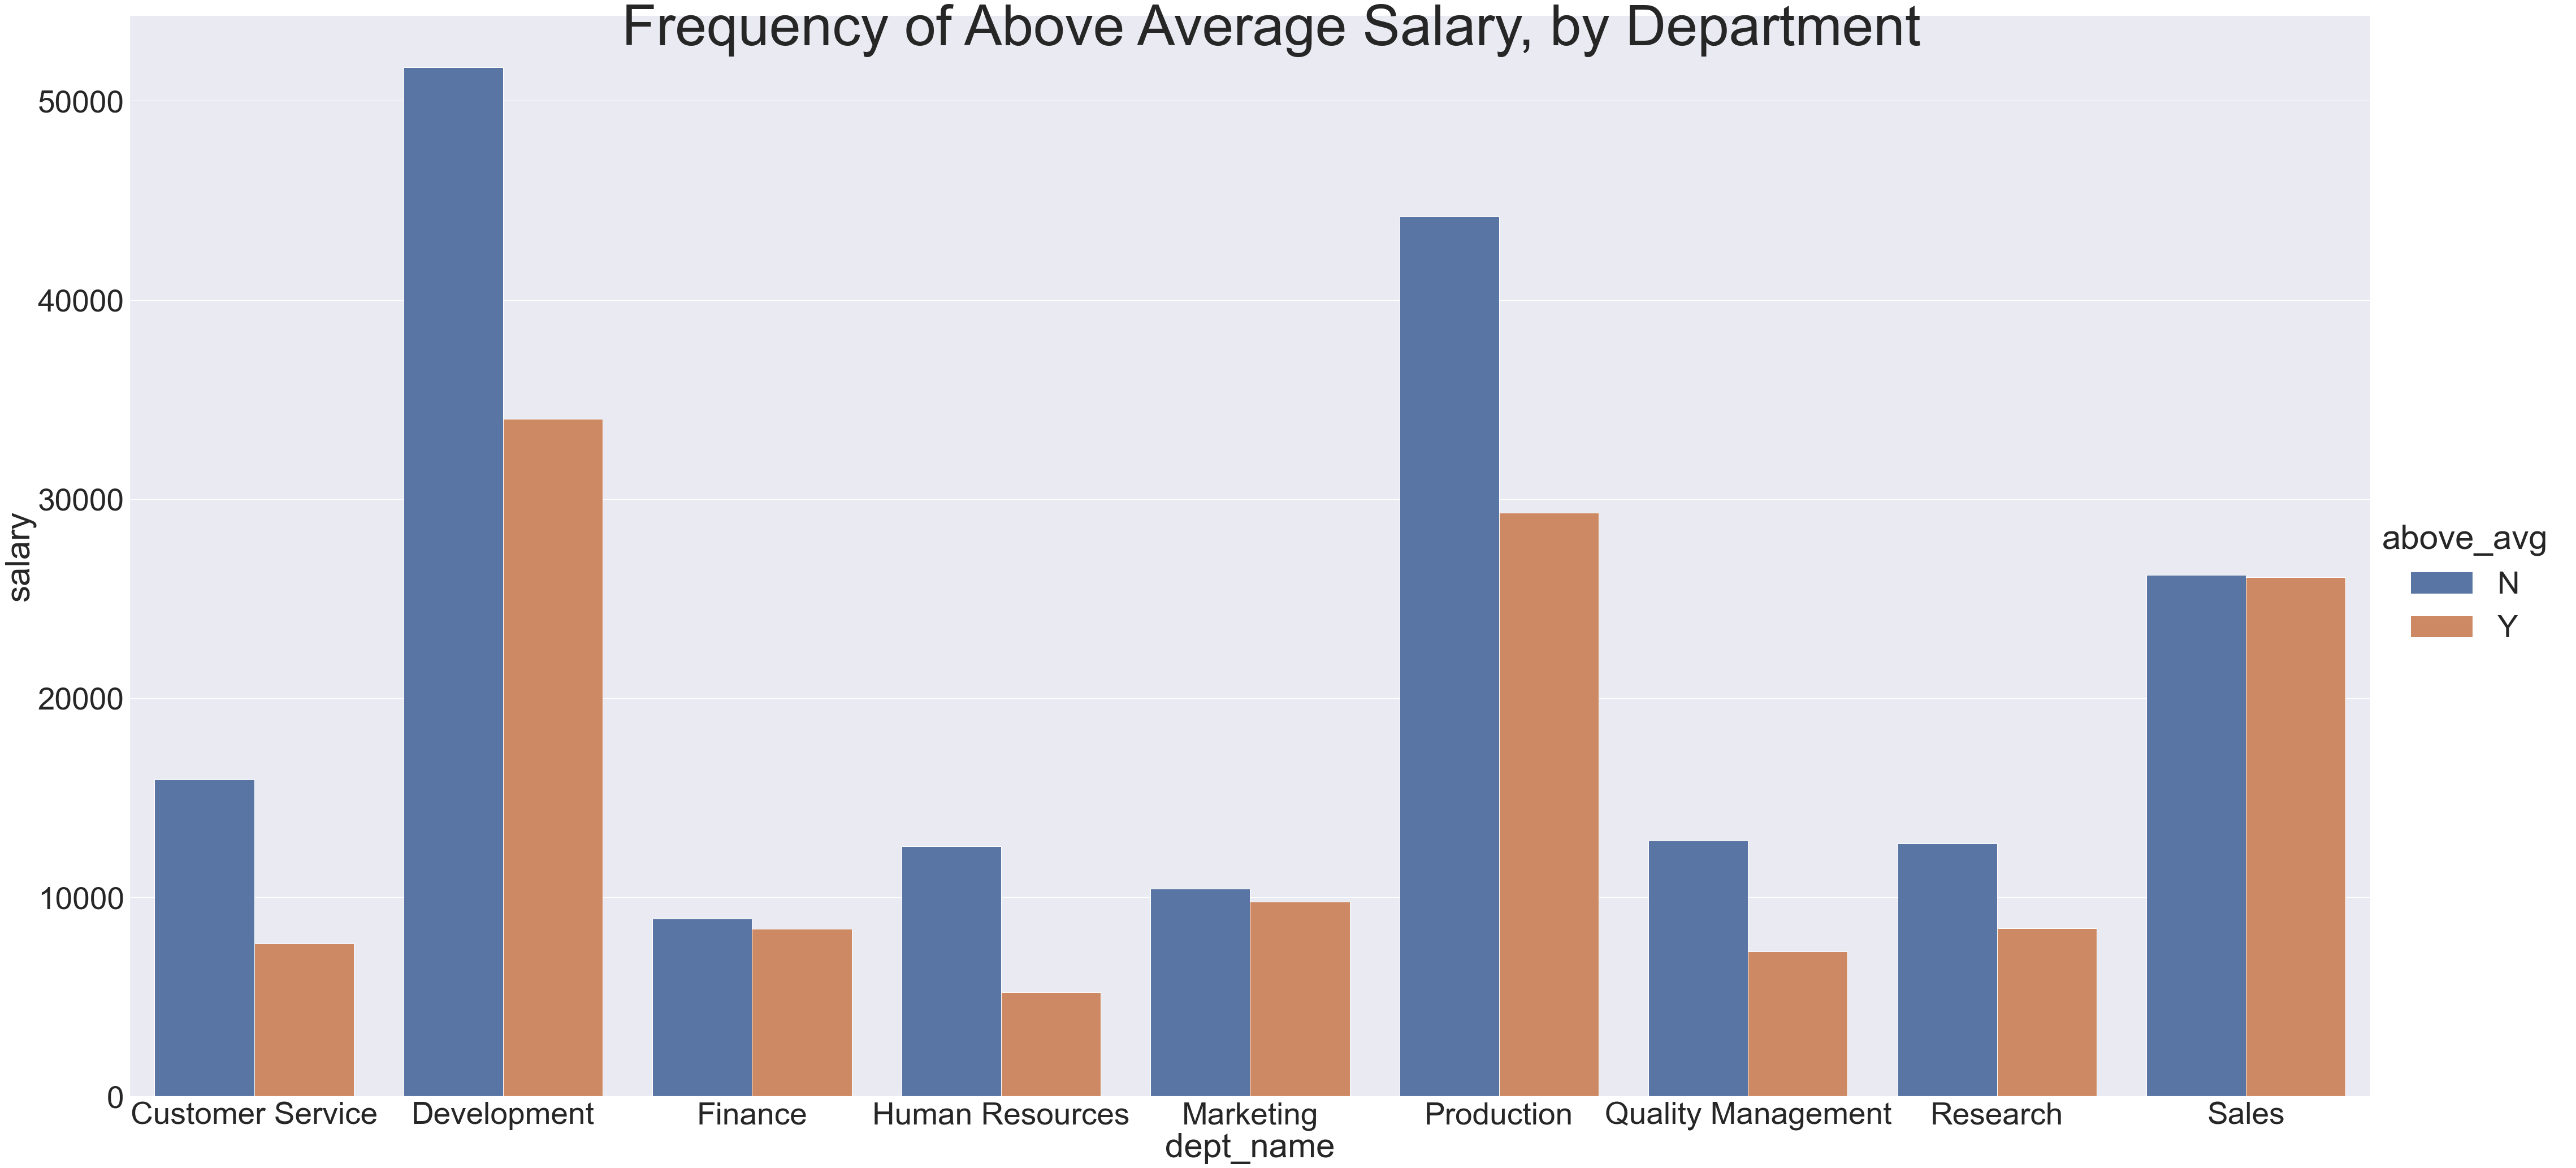

In [252]:
avg_df = frequency_over_avg.drop('hire_date', axis=1).groupby(['dept_name', 'above_avg']).count().reset_index()
avg_df

#Visualize paid over the average in each department
sns.set(font_scale=5)
plot = sns.catplot(data=avg_df,kind='bar',x='dept_name', y='salary', hue='above_avg', height=30, aspect=2)
plot.fig.suptitle("Frequency of Above Average Salary, by Department",
                  fontsize=100, fontdict={"weight": "bold"})

### <u>Salary Range of Employees</u>

#### It seem that the salary range is a left skewed distribution with a greater number of employee receiving a salary of $40000 and very few employees receiving a salary of $120000.

Text(0.5, 1.0, 'Salary Range')

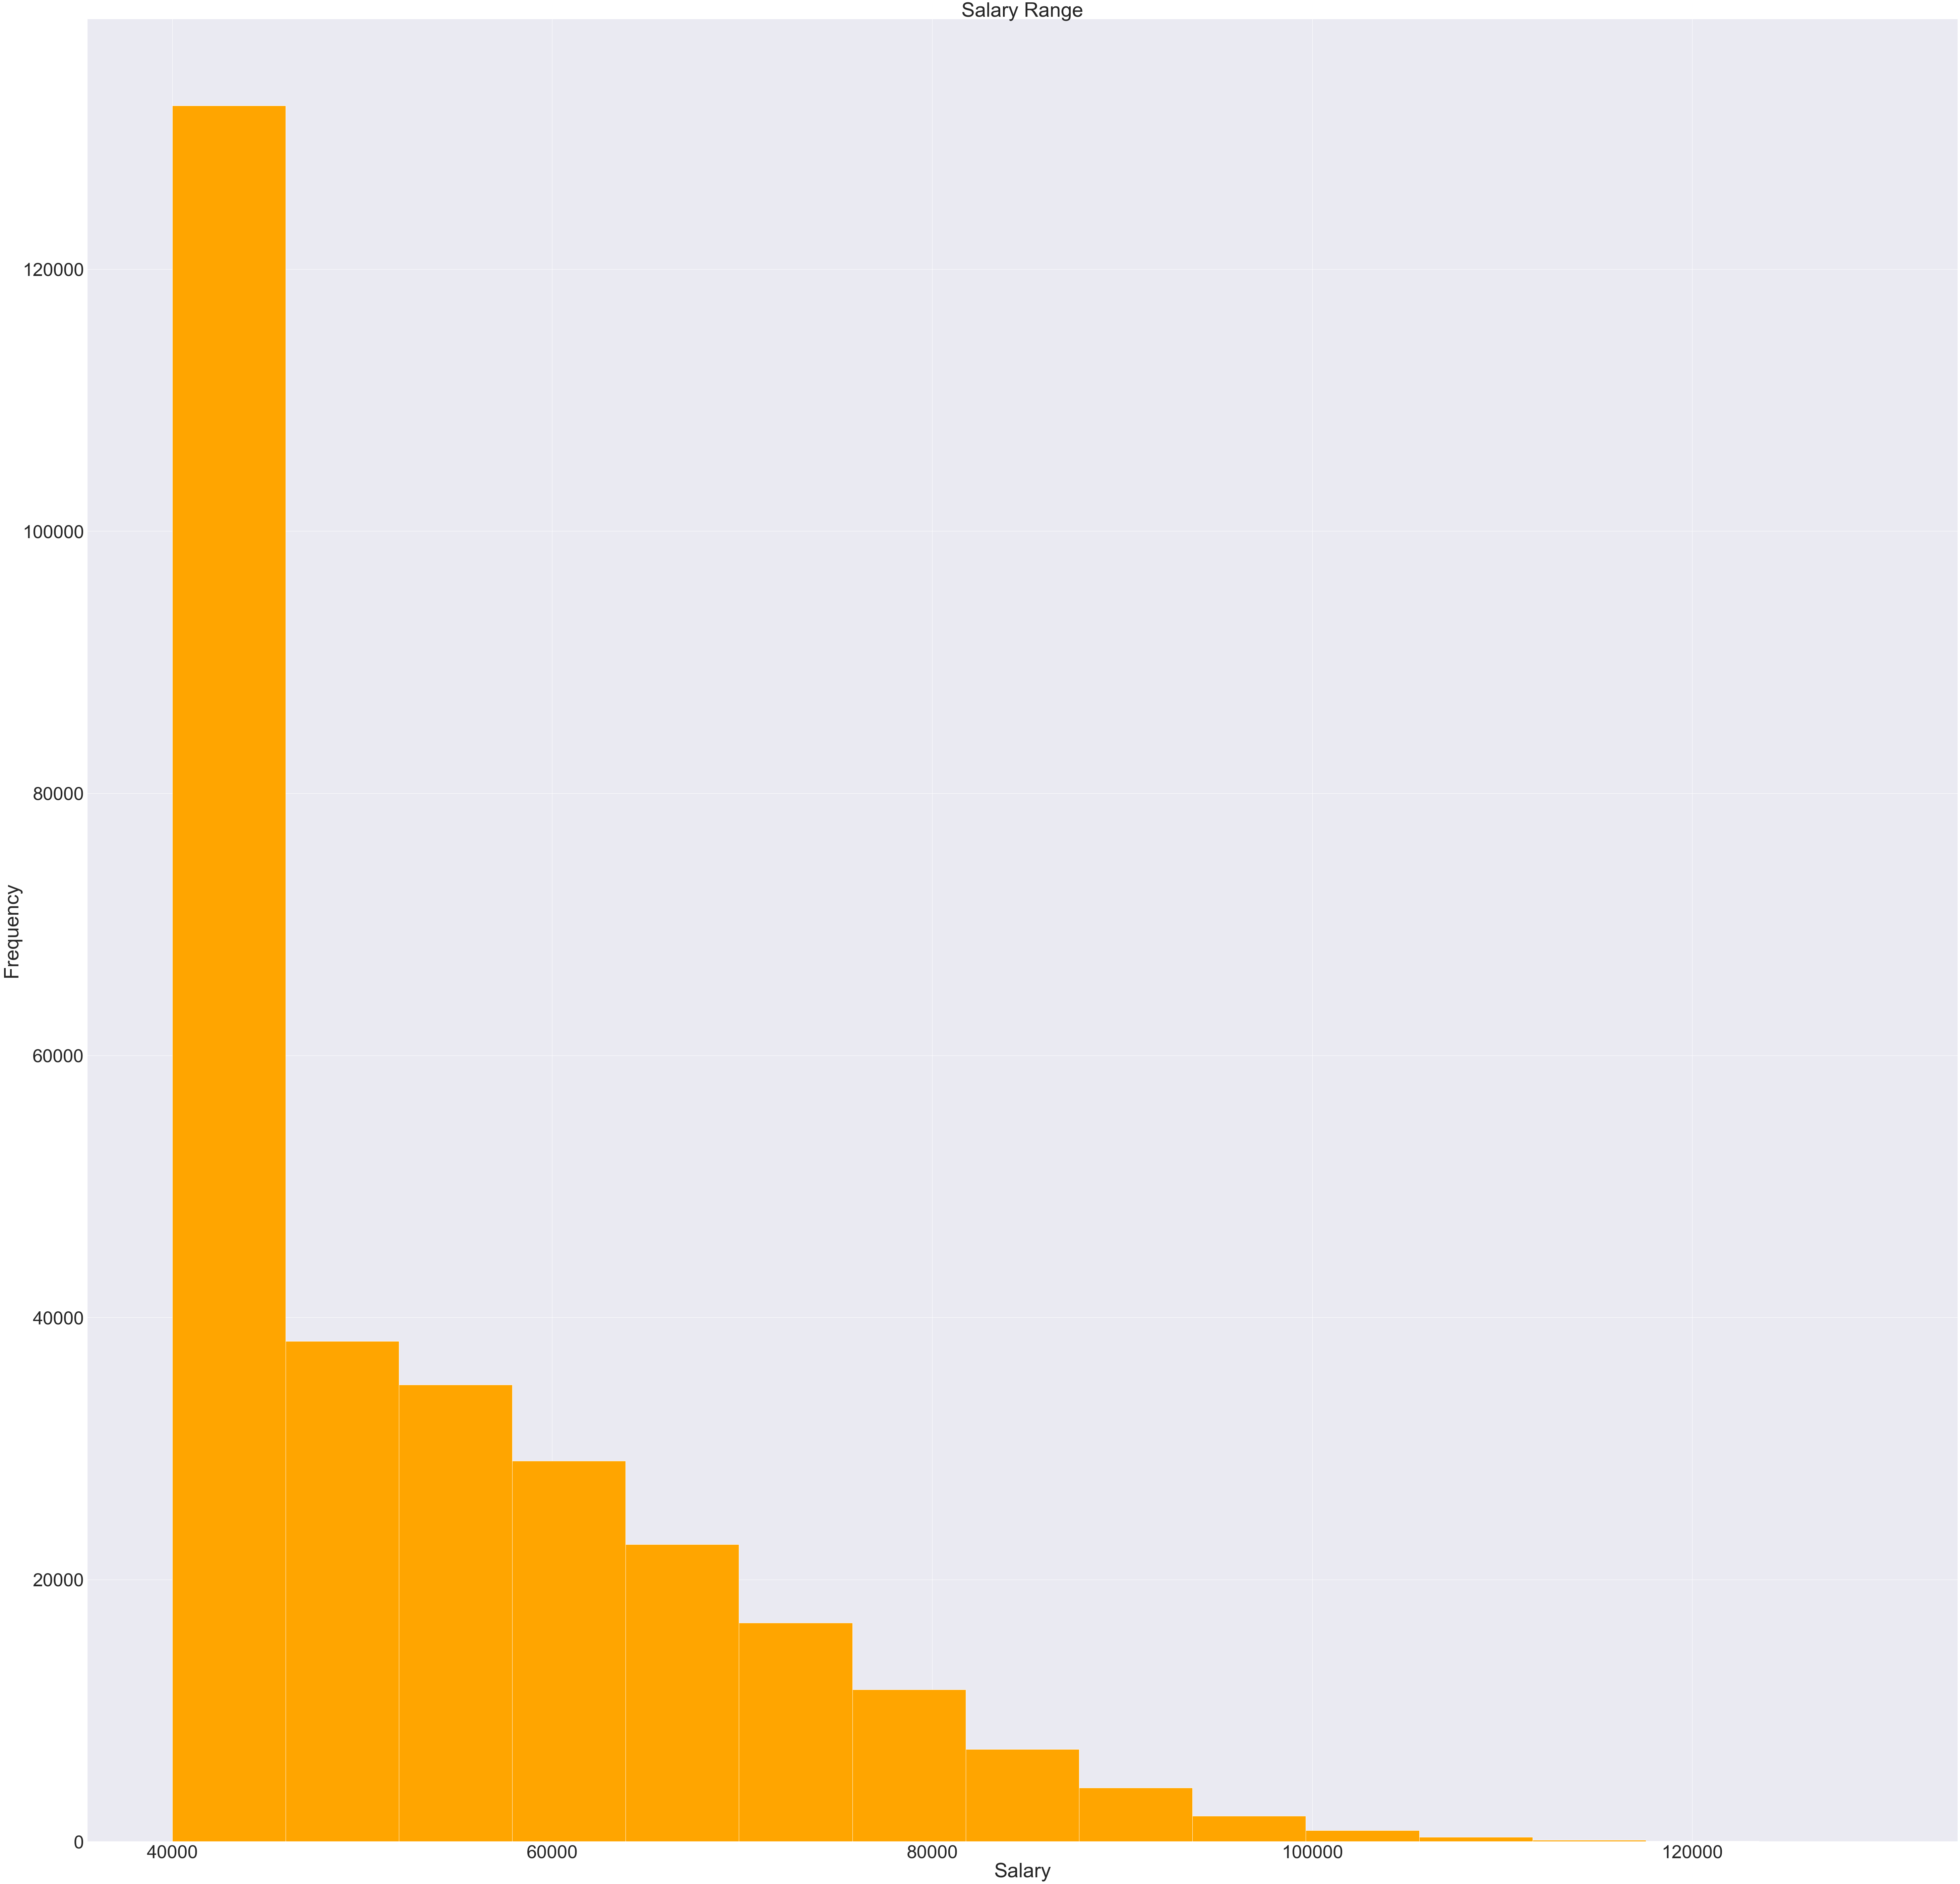

In [253]:
# list the employee number, last name, first name, sex, and salary of each employee
all_employees = pd.read_sql("SELECT e.emp_no, e.last_name, e.first_name, e.sex, s.salary FROM employees AS e INNER JOIN salaries AS s ON e.emp_no = s.emp_no;", conn)
all_employees
#Generate normal distribution of Salary
sns.set(font_scale=5)
employee_salary = all_employees['salary']
ax = employee_salary.plot.hist(bins=15, color='orange')
ax.set_xlabel('Salary')
ax.set_title('Salary Range')

In [254]:
#List the department of each employee with employee number, last_name, first_name and department name
dept_employee = pd.read_sql("SELECT e.emp_no, e.last_name, e.first_name, dtt.dept_name FROM employees AS e INNER JOIN dept_emp AS de ON de.emp_no = e.emp_no INNER JOIN departments AS dtt ON dtt.dept_no = de.dept_no;", conn)
dept_employee

,emp_no,last_name,first_name,dept_name
0,10005,Maliniak,Kyoichi,Human Resources
1,10010,Piveteau,Duangkaew,Production
2,10010,Piveteau,Duangkaew,Quality Management
3,10011,Sluis,Mary,Customer Service
4,10013,Terkki,Eberhardt,Human Resources
...,...,...,...,...
331598,499948,Paludetto,Cordelia,Production
331599,499972,Leuchs,Katsuo,Development
331600,499985,Lukaszewicz,Gila,Research
331601,499987,Dusink,Rimli,Sales


In [255]:
# List first name, last name and sex for employees whose first name is 'Hercules' and last names begin with 'B'
employees_hercules = pd.read_sql(text("SELECT e.first_name, e.last_name, e.sex FROM employees AS e WHERE first_name = 'Hercules' AND last_name LIKE 'B%';"), conn)
employees_hercules

,first_name,last_name,sex
0,Hercules,Baer,M
1,Hercules,Biron,F
2,Hercules,Birge,F
3,Hercules,Berstel,F
4,Hercules,Bernatsky,M
5,Hercules,Bail,F
6,Hercules,Bodoff,M
7,Hercules,Benantar,F
8,Hercules,Basagni,M
9,Hercules,Bernardinello,F


In [256]:
# List all employees in the Sales department, including their employee number, last name, first name, and department name
sales_dept = pd.read_sql(text("SELECT e.emp_no, e.last_name, e.first_name, dtt.dept_name FROM employees AS e INNER JOIN dept_emp AS de ON e.emp_no = de.emp_no INNER JOIN departments AS dtt ON de.dept_no = dtt.dept_no WHERE dtt.dept_name = 'Sales';"), conn)
sales_dept

,emp_no,last_name,first_name,dept_name
0,10002,Simmel,Bezalel,Sales
1,10016,Cappelletti,Kazuhito,Sales
2,10034,Swan,Bader,Sales
3,10041,Lenart,Uri,Sales
4,10050,Dredge,Yinghua,Sales
...,...,...,...,...
52240,499976,Felder,Guozhong,Sales
52241,499980,Usery,Gino,Sales
52242,499986,Ranta,Nathan,Sales
52243,499987,Dusink,Rimli,Sales


In [257]:
# List all employees in the Sales and Development departments, including their employee number, last name, first name, and department name.
sales_develop_dept = pd.read_sql("SELECT e.emp_no, e.last_name, e.first_name, d.dept_name FROM employees AS e INNER JOIN dept_emp ON e.emp_no = dept_emp.emp_no INNER JOIN departments AS d ON dept_emp.dept_no = d.dept_no WHERE d.dept_name IN ('Sales','Development');", conn)
sales_develop_dept

,emp_no,last_name,first_name,dept_name
0,10001,Facello,Georgi,Development
1,10002,Simmel,Bezalel,Sales
2,10006,Preusig,Anneke,Development
3,10008,Kalloufi,Saniya,Development
4,10012,Bridgland,Patricio,Development
...,...,...,...,...
137947,499986,Ranta,Nathan,Sales
137948,499987,Dusink,Rimli,Sales
137949,499988,Kleiser,Bangqing,Sales
137950,499990,Kohling,Khaled,Development


In [258]:
#List the frequency count of employee's last name in desc order
last_name_count = pd.read_sql("SELECT last_name, COUNT(last_name) AS total_count FROM employees GROUP BY last_name ORDER BY total_count DESC;", conn)
last_name_count

,last_name,total_count
0,Baba,226
1,Gelosh,223
2,Coorg,223
3,Sudbeck,222
4,Farris,222
...,...,...
1633,Georgatos,148
1634,Guardalben,148
1635,Merro,147
1636,Sadowsky,145


In [259]:
#List the total employees, total male/female, avg salary, total_salary in each department grouped by department and sex
dept_info = pd.read_sql("SELECT dtt.dept_name, COUNT(de.emp_no) AS total_employees, AVG(s.salary) as avg_salary, SUM(s.salary) as total_salary, e.sex, COUNT(e.sex) as gender_count FROM departments AS dtt INNER JOIN dept_emp AS de ON dtt.dept_no = de.dept_no INNER JOIN employees AS e ON e.emp_no = de.emp_no INNER JOIN salaries AS s ON s.emp_no = e.emp_no GROUP BY dtt.dept_name, e.sex ORDER BY avg_salary DESC;", conn)
dept_info

,dept_name,total_employees,avg_salary,total_salary,sex,gender_count
0,Sales,31391,69892.870313,2.194007e+09,M,31391
1,Sales,20854,69740.692002,1.454372e+09,F,20854
2,Marketing,12174,61204.985379,7.451095e+08,M,12174
3,Marketing,8037,60930.656962,4.896997e+08,F,8037
4,Finance,7015,59707.691661,4.188495e+08,F,7015
5,Finance,10331,59415.247411,6.138189e+08,M,10331
6,Research,12687,48863.007488,6.199250e+08,M,12687
7,Research,8439,48830.919777,4.120841e+08,F,8439
8,Production,43936,48797.159027,2.143952e+09,M,43936
9,Development,51449,48714.302027,2.506302e+09,M,51449
